# Example 1 : Time series SRA

Time series analysis to compute surface response spectrum and site 
amplification functions.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import pystrata

%matplotlib inline

In [ ]:
# Increased figure sizes
plt.rcParams["figure.dpi"] = 120

## Load time series data

In [ ]:
fname = "data/NIS090.AT2"
with open(fname) as fp:
    next(fp)
    description = next(fp).strip()
    next(fp)
    parts = next(fp).split()
    time_step = float(parts[1])

    accels = [float(part) for line in fp for part in line.split()]

    ts = pystrata.motion.TimeSeriesMotion(fname, description, time_step, accels)

In [ ]:
ts.accels

array([2.33833e-07, 2.99033e-07, 5.15835e-07, ..., 4.90601e-05,
       4.94028e-05, 4.96963e-05], shape=(4096,))

There are a few supported file formats. AT2 files can be loaded as follows:

In [ ]:
ts = pystrata.motion.TimeSeriesMotion.load_at2_file(fname)
ts.accels

array([2.33833e-07, 2.99033e-07, 5.15835e-07, ..., 4.90601e-05,
       4.94028e-05, 4.96963e-05], shape=(4096,))

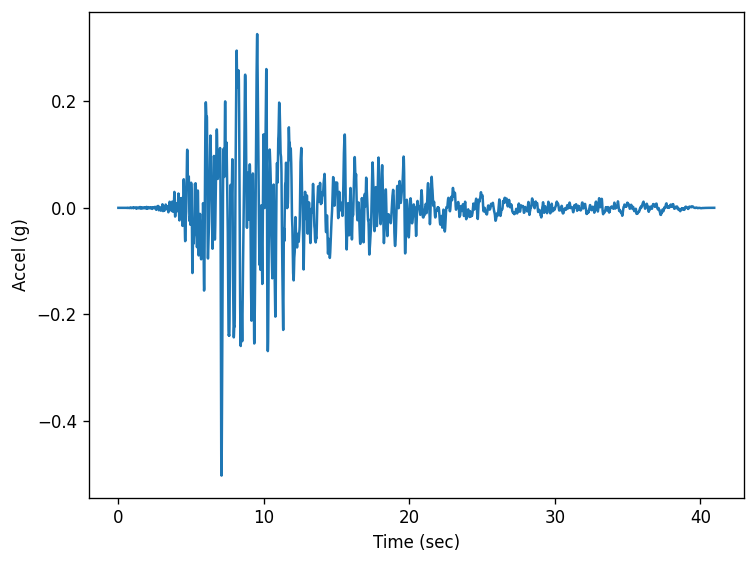

In [ ]:
fig, ax = plt.subplots()
ax.plot(ts.times, ts.accels)
ax.set(xlabel="Time (sec)", ylabel="Accel (g)")
fig.tight_layout();

## Create site profile

This is about the simplest profile that we can create. Linear-elastic soil and rock.

In [ ]:
profile = pystrata.site.Profile(
    [
        pystrata.site.Layer(pystrata.site.SoilType("Soil", 18.0, None, 0.05), 30, 400),
        pystrata.site.Layer(pystrata.site.SoilType("Rock", 24.0, None, 0.01), 0, 1200),
    ]
)

<Axes: xlabel='Initial $V_s$ (m/s)', ylabel='Depth (m)'>

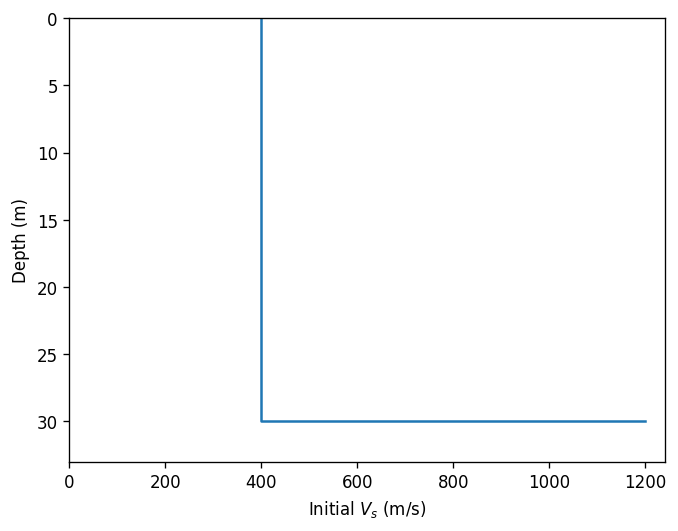

In [ ]:
profile.plot("initial_shear_vel")

## Create the site response calculator

In [ ]:
calc = pystrata.propagation.LinearElasticCalculator()

## Specify the output

In [ ]:
freqs = np.logspace(-1, 2, num=500)

outputs = pystrata.output.OutputCollection(
    [
        pystrata.output.ResponseSpectrumOutput(
            # Frequency
            freqs,
            # Location of the output
            pystrata.output.OutputLocation("outcrop", index=0),
            # Damping
            0.05,
        ),
        pystrata.output.ResponseSpectrumRatioOutput(
            # Frequency
            freqs,
            # Location in (denominator),
            pystrata.output.OutputLocation("outcrop", index=-1),
            # Location out (numerator)
            pystrata.output.OutputLocation("outcrop", index=0),
            # Damping
            0.05,
        ),
        pystrata.output.FourierAmplitudeSpectrumOutput(
            # Frequency
            freqs,
            # Location of the output
            pystrata.output.OutputLocation("outcrop", index=0),
            # Bandwidth for Konno-Omachi smoothing window
            ko_bandwidth=30,
        ),
    ]
)

## Perform the calculation

Compute the response of the site, and store the state within the calculation object. Nothing is provided.

In [ ]:
calc(ts, profile, profile.location("outcrop", index=-1))

Calculate all of the outputs from the calculation object.

In [ ]:
outputs(calc)

## Plot the outputs

Create a few plots of the output.

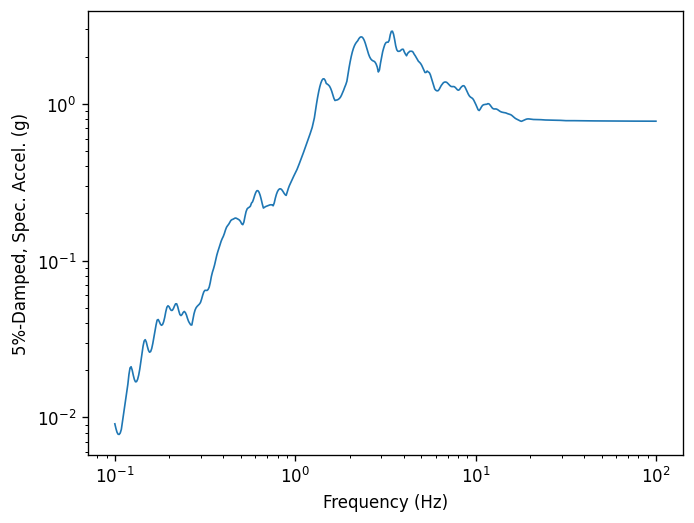

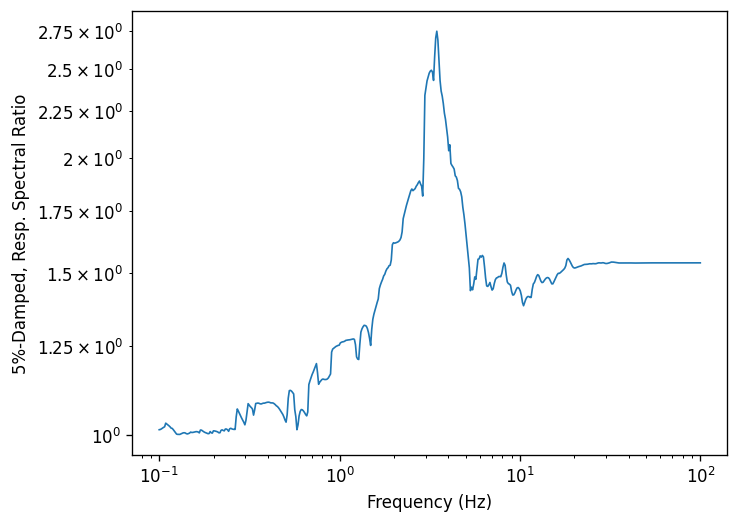

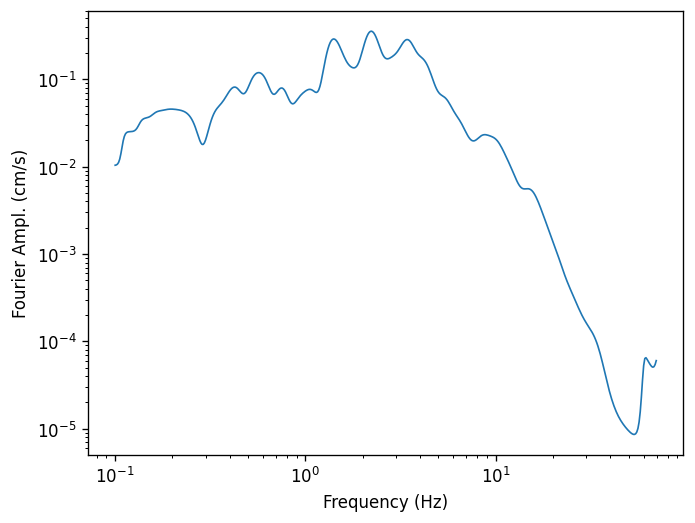

In [ ]:
for o in outputs:
    o.plot(style="indiv")